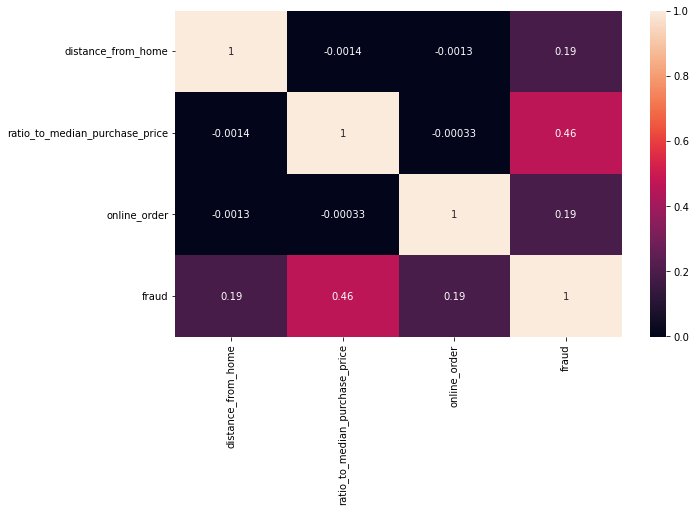

In [ ]:
import pandas as pd
import math
import seaborn as sns

df=pd.read_csv("card_transdata.csv")
df.drop(["distance_from_last_transaction","repeat_retailer", "used_chip", "used_pin_number"], axis=1, inplace=True)

import matplotlib.pyplot as plt
cor = df.corr()
plt.figure(figsize = (10,6))
sns.heatmap(cor,annot=True)  # ratio to median purchase price, online_order, distance_from_home

df = df.sample(frac = 1)
df.reset_index(inplace=True)

train = df.loc[:1000]
test = df.loc[700000:]

In [38]:
import math
known = train.loc[:99]
unknown = train.loc[100:199]
train.reset_index(drop=True,inplace=True)
train.reset_index(drop=True,inplace=True)
points = []
x=True

def calcDist(known, unknown, k):
    acc=0
    for i in range(len(unknown)):
        points = []
        for j in range(len(known)):
            points.append(((unknown.iat[i,1]-known.iat[j,1])**2+(unknown.iat[i,2]-known.iat[j,2])**2+(unknown.iat[i,3]-known.iat[j,3])**2)**0.5)
        pi = points.copy()
        points.sort()
        topPoints = points[:k-1]
        x = check(known,topPoints,i, pi)
        if x:
            acc+=1
        print(i)
    return acc

def check(known, topPoint,i, pi):
    vote=-1
    fraud=0
    notFraud=0
    for j in range (len(topPoint)):
        index = pi.index(topPoint[j])
        guess = known.iat[index,4]# error
        if guess ==0:
            notFraud+=1
        else:
            fraud+=1
    if fraud>notFraud:
        vote=0
    else:
        vote=1
    if unknown.iat[i,4] == vote:
        return True
    else:
        return False
    
def run(known, unknown):
    ks=[]
    accs=[]
    k = 3
    for i in range(10):
        acc = calcDist(known, unknown, k)
        ks.append(k)
        accs.append(acc)
        k+=2
    return ks, accs

ks, accs = run(known, unknown)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46

In [39]:
print(ks)
print(accs)

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
[9, 15, 14, 14, 14, 14, 14, 14, 14, 14]
